#Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install and import necessary libraries

In [ ]:
!pip install imantics --quiet

In [ ]:
import os
import cv2
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import imantics
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import shutil
from zipfile import ZipFile
import os


In [ ]:
# Path to the zipped dataset file
zipped_dataset_path = '/content/drive/MyDrive/dataset.zip'

# Update the destination directory for extraction
local_extracted_dir = '/content/extracted_images'

# Create the local extraction directory if it doesn't exist
os.makedirs(local_extracted_dir, exist_ok=True)

# Extract the zipped dataset
with ZipFile(zipped_dataset_path, 'r') as zip_ref:
    zip_ref.extractall(local_extracted_dir)

# Move the extracted content to the local directory
local_images_dir = os.path.join(local_extracted_dir, 'frames')
local_masks_dir = os.path.join(local_extracted_dir, 'masks')


# Move the extracted folders to the local directory
os.makedirs(local_images_dir, exist_ok=True)
os.makedirs(local_masks_dir, exist_ok=True)

# Move images
for file in os.listdir(local_images_dir):
    src = os.path.join(local_images_dir, file)
    dst = os.path.join(local_images_dir, file)
    shutil.move(src, dst)

# Move masks
for file in os.listdir(local_masks_dir):
    src = os.path.join(local_masks_dir, file)
    dst = os.path.join(local_masks_dir, file)
    shutil.move(src, dst)

# Count the number of images in local_images_dir
num_images = len(os.listdir(local_images_dir))

# Count the number of images in local_masks_dir
num_masks = len(os.listdir(local_masks_dir))

# Display the counts
print("Number of Images in frames directory:", num_images)
print("Number of Images in masks directory:", num_masks)


Number of Images in frames directory: 2729
Number of Images in masks directory: 2729


In [ ]:
images_dir = os.path.join(local_extracted_dir, 'frames')
masks_dir = os.path.join(local_extracted_dir, 'masks')


Frames Images:

Masks Images:


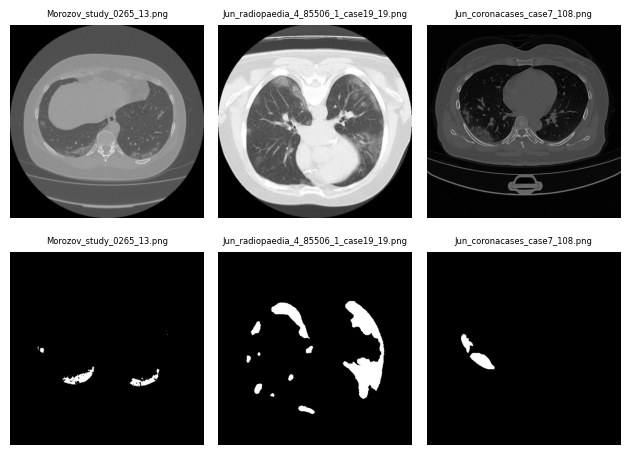

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Function to display images
def display_images(directory, folder_name, num_images=3):
    print(f"\n{folder_name} Images:")
    for i, file in enumerate(os.listdir(directory)[:num_images]):
        img_path = os.path.join(directory, file)
        img = mpimg.imread(img_path)


        # Display image with smaller text
        plt.subplot(2, num_images, i + 1 + (num_images * (folder_name == 'Masks')))
        plt.imshow(img)
        plt.axis('off')
        plt.title(file, fontsize=6)  # Adjust fontsize as needed

# Display first 3 images from 'frames' directory
display_images(local_images_dir, 'Frames', num_images=3)

# Display first 3 images from 'masks' directory
display_images(local_masks_dir, 'Masks', num_images=3)

# Adjust layout for better display
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
def read_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, input_image_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


# Display the header of the DataFrame
print("Dataset Header:")
print(tile_df.head())

# Display information about the number of images
print("\nNumber of Images in Skin Lesions Dataset:")
print("Total Images:", number)  # Adjust 'number' based on your requirement
print("Number of Images Loaded:", len(os.listdir(images_dir)))


In [ ]:
!pip install imantics --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
import os
import cv2
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import imantics
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split
%matplotlib inline

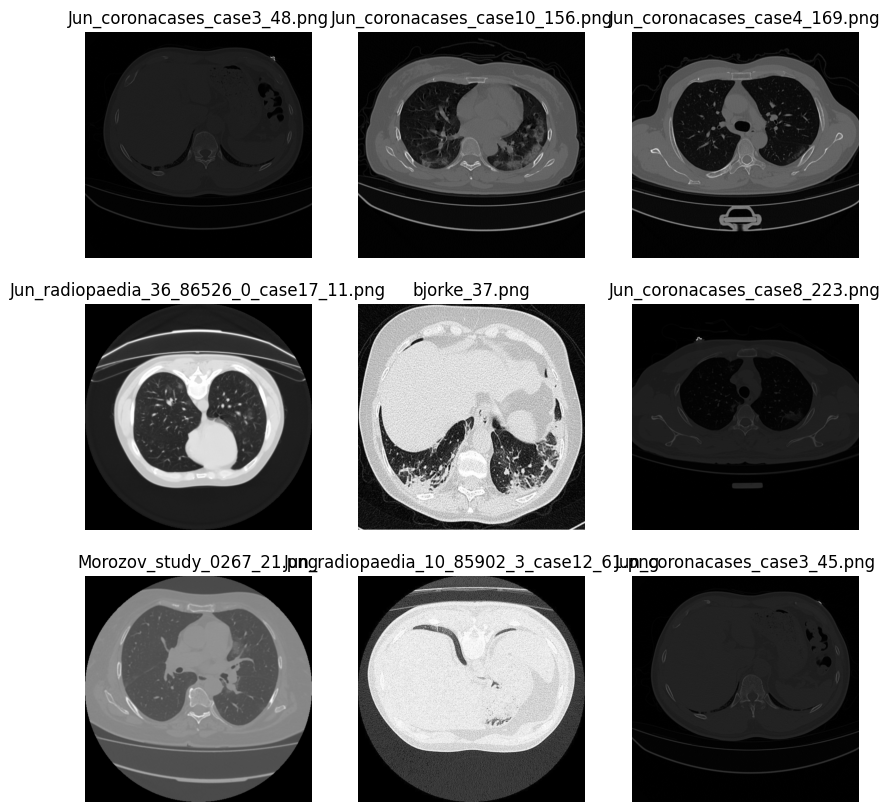

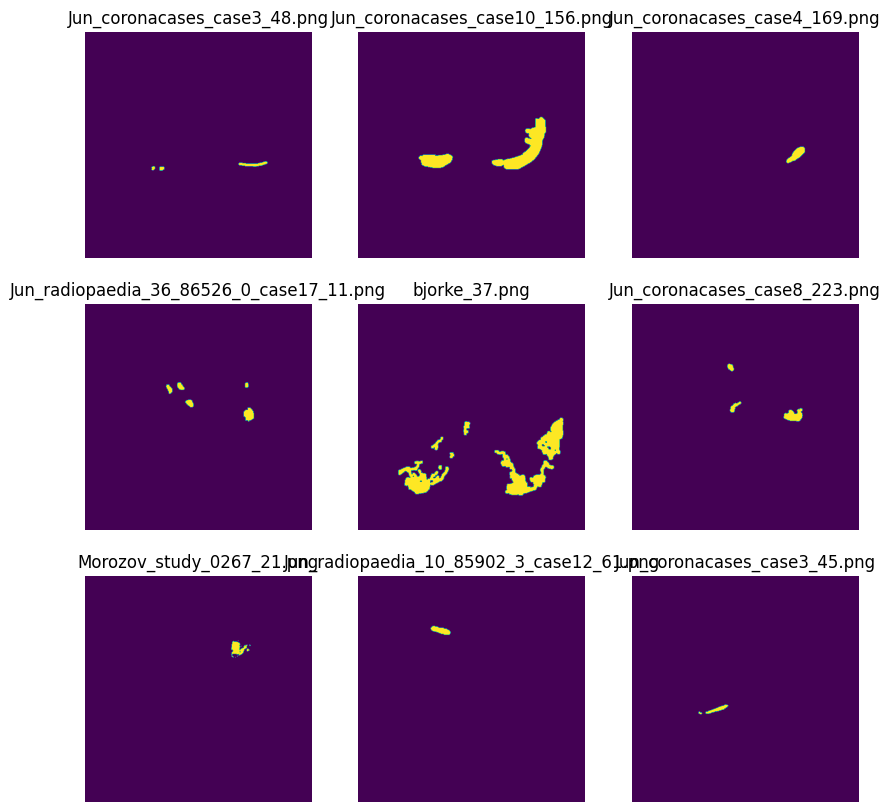

In [ ]:
images_listdir = os.listdir(local_images_dir)
random_images = np.random.choice(images_listdir, size = 9, replace = False)
rows = 3
cols = 3
image_size=512
input_image_size=(512,512)
fig, ax = plt.subplots(rows, cols, figsize = (10,10))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        img = read_image(f"{local_images_dir}/{random_images[i]}")
        ax.set_title(f"{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')

fig, ax = plt.subplots(rows, cols, figsize = (10,10))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        file=random_images[i]
        if os.path.exists(os.path.join(local_masks_dir,file)):
            img = read_image(f"{local_masks_dir}/{file}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ax.set_title(f"{random_images[i]}")
            ax.imshow(img)
            ax.axis('off')
        else:
            print('not exist')

In [ ]:
MASKS=np.zeros((1,image_size, image_size, 1), dtype=bool)
IMAGES=np.zeros((1,image_size, image_size, 3),dtype=np.uint8)
number=40
for j,file in enumerate(images_listdir[0:number]):   ##the smaller, the faster
    try:
        image = read_image(f"{images_dir}/{file}")
        image_ex = np.expand_dims(image, axis=0)
        IMAGES = np.vstack([IMAGES, image_ex])
        mask = read_image(f"{masks_dir}/{file}")
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = mask.reshape(512,512,1)
        mask_ex = np.expand_dims(mask, axis=0)
        MASKS = np.vstack([MASKS, mask_ex])
    except:
        print(file)
        continue

In [ ]:
images=np.array(IMAGES)[1:number+1]
masks=np.array(MASKS)[1:number+1]
print(images.shape,masks.shape)

(40, 512, 512, 3) (40, 512, 512, 1)


In [ ]:
images_train, images_test, masks_train, masks_test = train_test_split(
    images, masks, test_size=0.4, random_state=42)
print(len(images_train), len(masks_train))

24 24


In [ ]:
def conv_block(input, num_filters):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters):
    skip = conv_block(input, num_filters)
    pool = tf.keras.layers.MaxPool2D((2,2))(skip)
    return skip, pool

def decoder_block(input, skip, num_filters):
    up_conv = tf.keras.layers.Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(input)
    conv = tf.keras.layers.Concatenate()([up_conv, skip])
    conv = conv_block(conv, num_filters)
    return conv

def Unet(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256)
    skip4, pool4 = encoder_block(pool3, 512)

    bridge = conv_block(pool4, 1024)

    decode1 = decoder_block(bridge, skip4, 512)
    decode2 = decoder_block(decode1, skip3, 256)
    decode3 = decoder_block(decode2, skip2, 128)
    decode4 = decoder_block(decode3, skip1, 64)
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)
    model = tf.keras.models.Model(inputs, outputs, name="U-Net")
    return model

unet_model = Unet((512,512,3))
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 512, 512, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 512, 512, 64)         0         ['batch_normalization[0][0

In [ ]:
unet_result = unet_model.fit(
    images_train, masks_train,
    validation_split = 0.2, batch_size = 4, epochs = 10)

Epoch 1/10
5/5 [==============================] - 738s 144s/step - loss: -4.7917 - accuracy: 0.3871 - val_loss: 87.3111 - val_accuracy: 0.9002
Epoch 2/10
5/5 [==============================] - 652s 131s/step - loss: -16.5225 - accuracy: 0.5375 - val_loss: -61814.9805 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 693s 141s/step - loss: -33.0424 - accuracy: 0.6559 - val_loss: -6388.9331 - val_accuracy: 0.0297
Epoch 4/10
5/5 [==============================] - 689s 141s/step - loss: -29.3699 - accuracy: 0.6220 - val_loss: -23472.8965 - val_accuracy: 0.0061
Epoch 5/10
5/5 [==============================] - 659s 133s/step - loss: -44.4275 - accuracy: 0.6720 - val_loss: -41880.0391 - val_accuracy: 7.6294e-07
Epoch 6/10
5/5 [==============================] - 646s 130s/step - loss: -61.7607 - accuracy: 0.5964 - val_loss: -481901.0938 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 678s 137s/step - loss: -41.2653 - accuracy: 0.6043 - va

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = unet_model.evaluate(images_test, masks_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

1/1 [==============================] - 139s 139s/step - loss: -2374873.2500 - accuracy: 0.0000e+00
Test Loss: -2374873.25
Test Accuracy: 0.0


In [ ]:
import tensorflow as tf

def conv_block(input, num_filters):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters):
    skip = conv_block(input, num_filters)
    pool = tf.keras.layers.MaxPool2D((2,2))(skip)
    return skip, pool

def decoder_block(input, skip, num_filters):
    up_conv = tf.keras.layers.Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(input)
    conv = tf.keras.layers.Concatenate()([up_conv, skip])
    conv = conv_block(conv, num_filters)
    return conv

def FCN(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256)
    skip4, pool4 = encoder_block(pool3, 512)

    bridge = conv_block(pool4, 1024)

    decode1 = decoder_block(bridge, skip4, 512)
    decode2 = decoder_block(decode1, skip3, 256)
    decode3 = decoder_block(decode2, skip2, 128)
    decode4 = decoder_block(decode3, skip1, 64)

    # Replace the dense layer with a convolutional layer
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)

    model = tf.keras.models.Model(inputs, outputs, name="FCN")
    return model

fcn_model = FCN((512, 512, 3))
fcn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fcn_model.summary()


Model: "FCN"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 512, 512, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 512, 512, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 512, 512, 64)         0         ['batch_normalization_18[0][

In [ ]:
# Train the FCN model
history = fcn_model.fit(
    images_train, masks_train,
    validation_split = 0.2, batch_size = 4, epochs = 10)


Epoch 1/10
5/5 [==============================] - 624s 125s/step - loss: -6.6049 - accuracy: 0.4790 - val_loss: 67.6731 - val_accuracy: 0.8592
Epoch 2/10
5/5 [==============================] - 650s 133s/step - loss: -20.6197 - accuracy: 0.5246 - val_loss: -15778.9629 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 615s 125s/step - loss: -16.8385 - accuracy: 0.5578 - val_loss: -600681.1250 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 665s 136s/step - loss: -14.0415 - accuracy: 0.6320 - val_loss: -685728.3125 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 665s 136s/step - loss: -26.3922 - accuracy: 0.5994 - val_loss: -4430281.5000 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 661s 135s/step - loss: -42.4056 - accuracy: 0.5137 - val_loss: -24268388.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 627s 126s/step - loss: -63.8670 - accura

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = fcn_model.evaluate(images_test, masks_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

In [ ]:
import tensorflow as tf

def conv_block(input, num_filters, dilation_rate=1):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same", dilation_rate=dilation_rate)(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same", dilation_rate=dilation_rate)(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters, dilation_rate=1):
    conv = conv_block(input, num_filters, dilation_rate=dilation_rate)
    pool = tf.keras.layers.MaxPool2D((2,2))(conv)
    return conv, pool

def DeepLabV1(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256, dilation_rate=2)
    skip4, pool4 = encoder_block(pool3, 512, dilation_rate=4)

    bridge = conv_block(pool4, 1024, dilation_rate=8)

    decode1 = tf.keras.layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding="same")(bridge)
    decode1 = tf.keras.layers.Concatenate()([decode1, skip4])
    decode1 = conv_block(decode1, 512)

    decode2 = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding="same")(decode1)
    decode2 = tf.keras.layers.Concatenate()([decode2, skip3])
    decode2 = conv_block(decode2, 256)

    decode3 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same")(decode2)
    decode3 = tf.keras.layers.Concatenate()([decode3, skip2])
    decode3 = conv_block(decode3, 128)

    decode4 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same")(decode3)
    decode4 = tf.keras.layers.Concatenate()([decode4, skip1])
    decode4 = conv_block(decode4, 64)

    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)

    model = tf.keras.models.Model(inputs, outputs, name="DeepLabV1")
    return model

deeplab_model = DeepLabV1((512, 512, 3))
deeplab_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deeplab_model.summary()




Model: "DeepLabV1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_41 (Conv2D)          (None, 512, 512, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 batch_normalization_36 (Ba  (None, 512, 512, 64)         256       ['conv2d_41[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_36 (Activation)  (None, 512, 512, 64)         0         ['batch_normalization_

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('deeplabv1_model.h5', save_best_only=True)
history = deeplab_model.fit( images_train, masks_train, batch_size=16, epochs=20, validation_split=0.2, callbacks=[checkpoint])

In [3]:
import tensorflow as tf

def conv_block(input, num_filters, dilation_rate=1):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same", dilation_rate=dilation_rate)(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same", dilation_rate=dilation_rate)(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters, dilation_rate=1):
    conv = conv_block(input, num_filters, dilation_rate=dilation_rate)
    pool = tf.keras.layers.MaxPool2D((2,2))(conv)
    return conv, pool

def FastRCNN(input_shape, num_classes):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256, dilation_rate=2)
    skip4, pool4 = encoder_block(pool3, 512, dilation_rate=4)

    rpn_conv = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    rpn_cls = tf.keras.layers.Conv2D(18, (1, 1), activation='softmax', name='rpn_cls')(rpn_conv)
    rpn_reg = tf.keras.layers.Conv2D(36, (1, 1), activation='linear', name='rpn_reg')(rpn_conv)

    roi_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(pool4)

    flatten = tf.keras.layers.Flatten()(roi_pool)
    fc1 = tf.keras.layers.Dense(4096, activation='relu')(flatten)
    fc2 = tf.keras.layers.Dense(4096, activation='relu')(fc1)

    cls_output = tf.keras.layers.Dense(num_classes, activation='softmax', name='cls_output')(fc2)
    reg_output = tf.keras.layers.Dense(num_classes * 4, activation='linear', name='reg_output')(fc2)

    model = tf.keras.models.Model(inputs=inputs, outputs=[rpn_cls, rpn_reg, cls_output, reg_output], name="FastRCNN")
    return model

fast_rcnn_model = FastRCNN((512, 512, 3), num_classes=10)  # Adjust num_classes according to your dataset
fast_rcnn_model.compile(optimizer='adam',
                        loss={'rpn_cls': 'sparse_categorical_crossentropy',
                              'rpn_reg': 'smooth_l1',
                              'cls_output': 'sparse_categorical_crossentropy',
                              'reg_output': 'smooth_l1'},
                        loss_weights={'rpn_cls': 1.0,
                                      'rpn_reg': 1.0,
                                      'cls_output': 1.0,
                                      'reg_output': 1.0})
fast_rcnn_model.summary()


Model: "FastRCNN"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_18 (Conv2D)          (None, 512, 512, 64)         1792      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_16 (Ba  (None, 512, 512, 64)         256       ['conv2d_18[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_16 (Activation)  (None, 512, 512, 64)         0         ['batch_normalization_1